## **K-Means, Hierarchical and DBSCAN - Clustering Analysis**

**Introduction**

Clustering is an essential technique in unsupervised learning, often used for finding patterns or groups in a dataset. This notebook explores three different clustering techniques: **K-Means**, **Hierarchical Clustering**, and **DBSCAN** using a synthetic dataset where points are arranged in circular patterns with added noise.

**We will:**
- Generate a dataset consisting of circular clusters and noise.
- Apply **K-Means Clustering** and determine the optimal number of clusters using the Elbow Method.
- Apply **Hierarchical Clustering**, use **Dendrogram** to determine the optimal number of clusters.
- Apply **DBSCAN**, a density-based clustering technique, and fine-tune its hyperparameters using the K-Distance Graph.


#### **Importing necessary libraries**

In [27]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set_style("darkgrid")
np.random.seed(42)

#### **Create and Visualize the Dataset**

In [29]:
def PointsInCircum(r, n=100):
    return [
        (
            math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),
            math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30),
        )
        for x in range(1, n + 1)
    ]

In [30]:
columns = ["Feature_1", "Feature_2"]

df1 = pd.DataFrame(PointsInCircum(500, 1000), columns=columns)
df2 = pd.DataFrame(PointsInCircum(300, 700), columns=columns)
df3 = pd.DataFrame(PointsInCircum(100, 300), columns=columns)

noise = pd.DataFrame(
    [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)],
    columns=columns,
)

data = pd.concat([df1, df2, df3, noise], ignore_index=True)

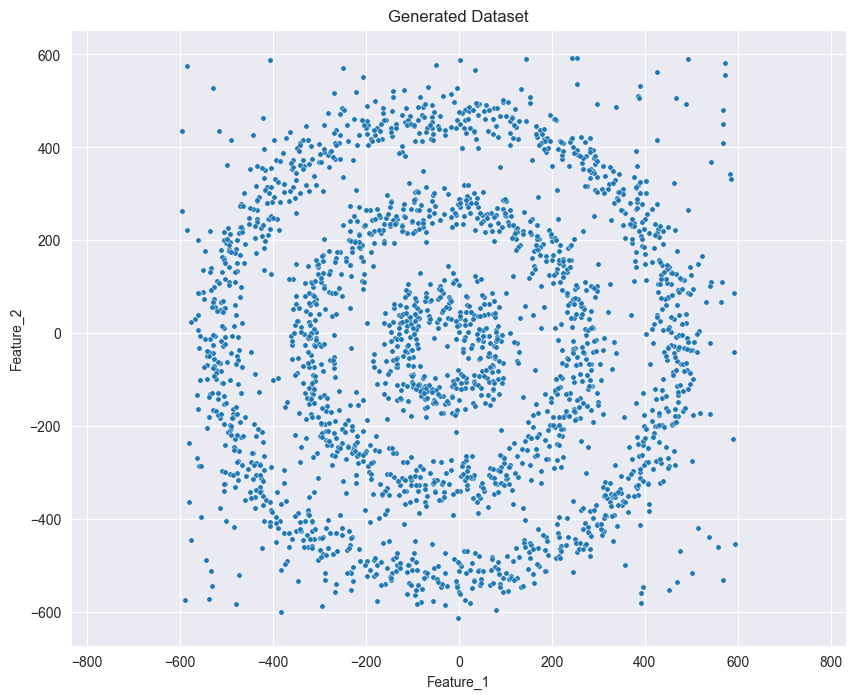

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="Feature_1", y="Feature_2", s=15)
plt.title("Generated Dataset")
plt.axis("equal")
plt.show()

---

#### **K-Means Clustering**

In [32]:
from sklearn.cluster import KMeans

**Using the Elbow Method to Determine the Optimal Number of Clusters**

In [33]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

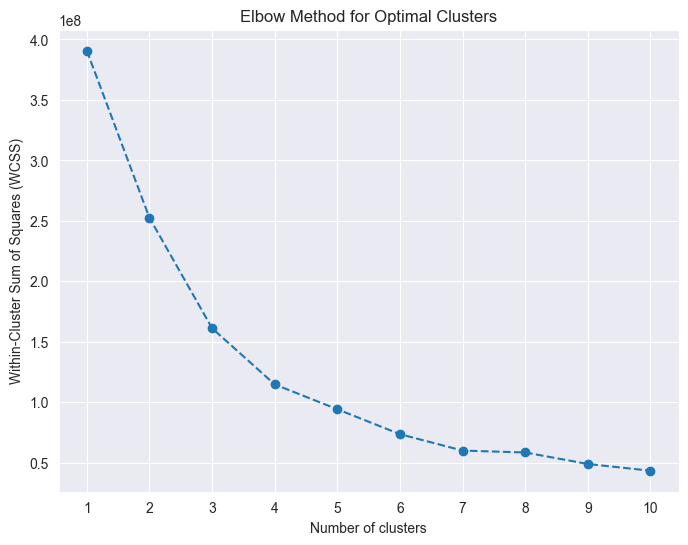

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, "--o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()

**Training the K-Means Model on the Dataset**

In [35]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(data)

In [36]:
data["KMeans_Clusters"] = y_kmeans
cluster_centers = kmeans.cluster_centers_

**Visualizing K-Means Clustering Results**

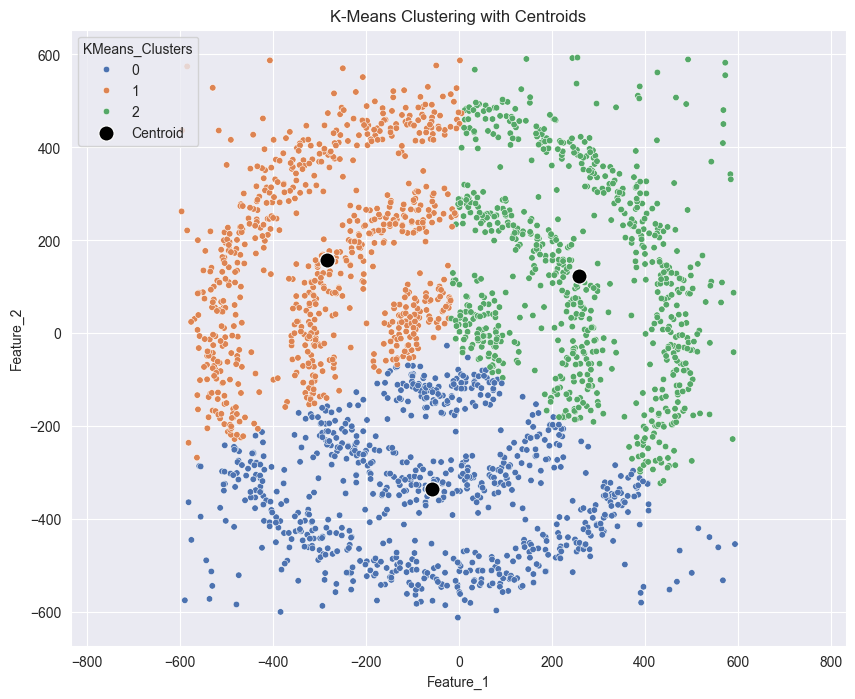

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data, x="Feature_1", y="Feature_2", hue="KMeans_Clusters", s=22, palette="deep"
)
sns.scatterplot(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    color="black",
    label="Centroid",
    s=120,
)

plt.title("K-Means Clustering with Centroids")
plt.legend(title="KMeans_Clusters")
plt.axis("equal")
plt.show()

---

#### **Hierarchical Clustering**

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

**Using Dendrogram to Find the Optimal Number of Clusters**

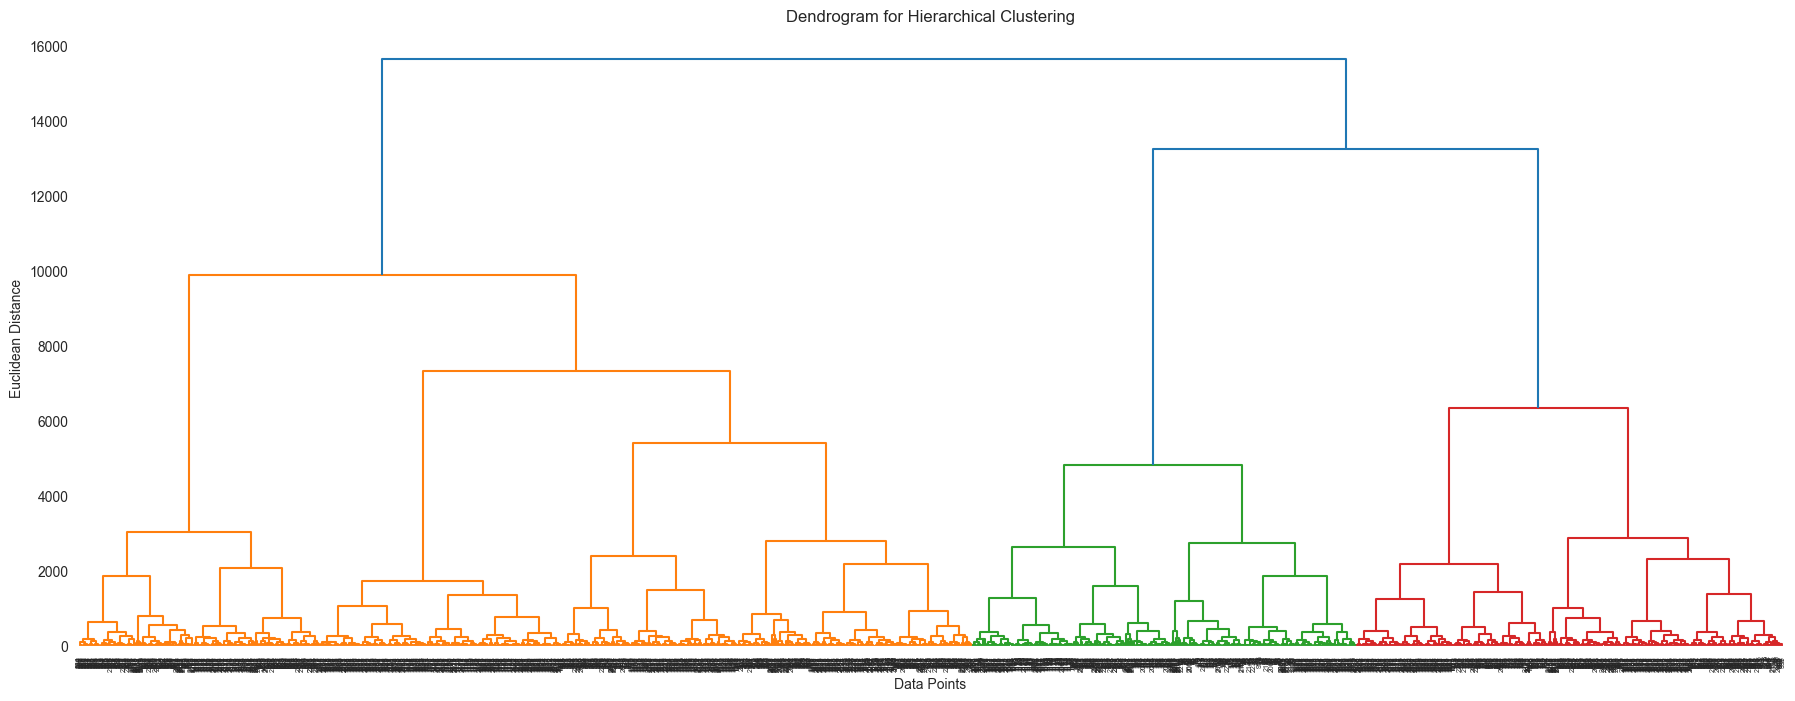

In [39]:
plt.figure(figsize=(22, 8))
dendrogram = sch.dendrogram(sch.linkage(data, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.show()

**Training the Hierarchical Clustering Model**

In [40]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
y_hc = hc.fit_predict(data)

In [41]:
data["Hierarchical_Clusters"] = y_hc

**Visualizing Hierarchical Clustering Results**

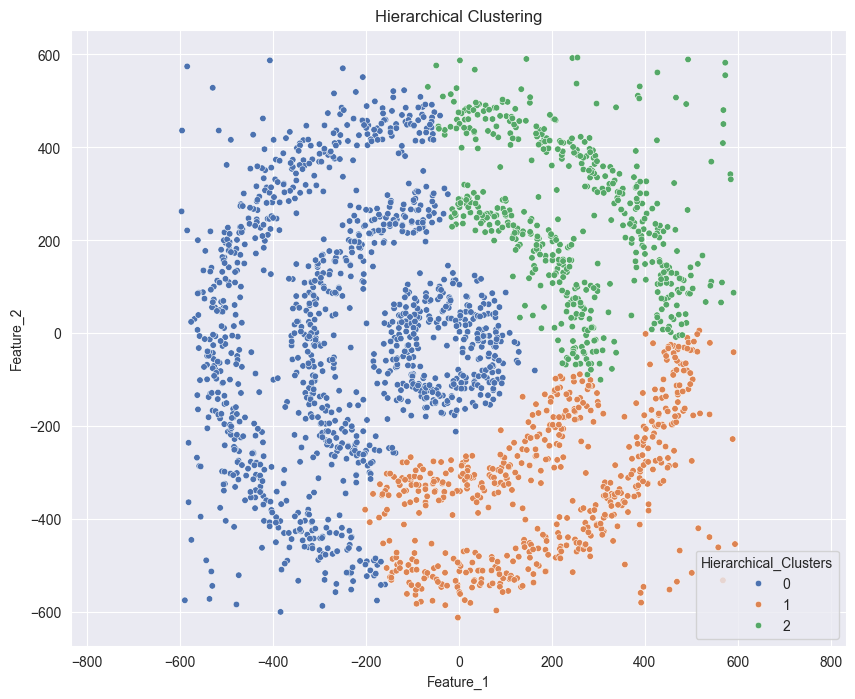

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data,
    x="Feature_1",
    y="Feature_2",
    hue="Hierarchical_Clusters",
    s=22,
    palette="deep",
)
plt.title("Hierarchical Clustering")
plt.axis("equal")
plt.show()

---

#### **DBSCAN Clustering**

In [43]:
from sklearn.neighbors import NearestNeighbors

**Determining optimal epsilon (eps) using the K-Distance Graph**

In [44]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
nearest_neighbors.fit(data)

distances, indices = nearest_neighbors.kneighbors(data)

In [45]:
distances = np.sort(distances, axis=0)
# Focus on the distance to the second nearest neighbor
second_neighbor_distances = distances[:, 1]

**Plot the K-Distance Graph to Determine eps**

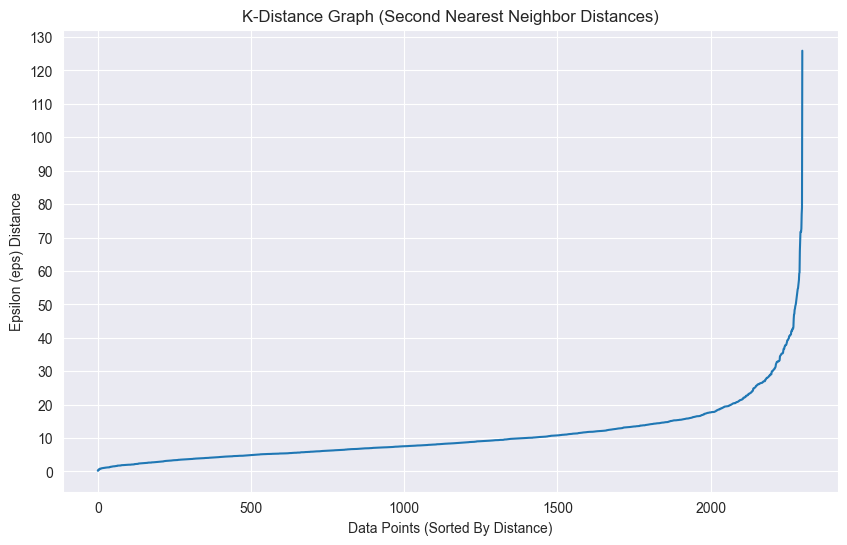

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(second_neighbor_distances)
plt.title("K-Distance Graph (Second Nearest Neighbor Distances)")
plt.xlabel("Data Points (Sorted By Distance)")
plt.ylabel("Epsilon (eps) Distance")
plt.yticks(np.arange(0, np.max(second_neighbor_distances) + 10, 10))
plt.show()

**Apply DBSCAN Clustering Algorithm**

In [47]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=45, min_samples=6, metric="euclidean")
dbscan_model.fit(data)

DBSCAN(eps=45, min_samples=6)

In [48]:
data["DBSCAN_Clusters"] = dbscan_model.labels_

In [49]:
dbscan_clusters_counts = data["DBSCAN_Clusters"].value_counts()
num_clusters = (dbscan_clusters_counts.index != -1).sum()
print(f"Number of clusters (excluding noise): {num_clusters}")

Number of clusters (excluding noise): 3


**Pie Chart of DBSCAN Cluster Distribution**

In [50]:
dbscan_clusters_counts

DBSCAN_Clusters
 0    1114
 1     774
 2     327
-1      85
Name: count, dtype: int64

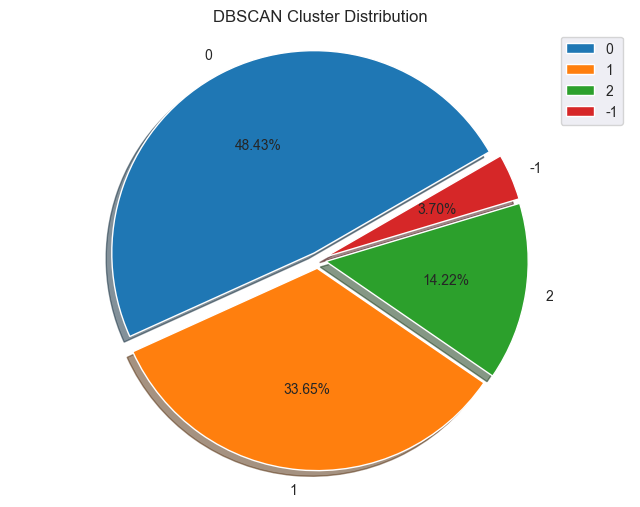

In [51]:
plt.figure(figsize=(8, 6))
plt.pie(
    dbscan_clusters_counts,
    labels=dbscan_clusters_counts.index,
    shadow=True,
    explode=np.ones(len(dbscan_clusters_counts)) * 0.04,
    autopct="%.2f%%",
    startangle=30,
)
plt.axis("equal")
plt.title("DBSCAN Cluster Distribution")
plt.legend()
plt.show()

**Visualizing DBSCAN Clustering Results**

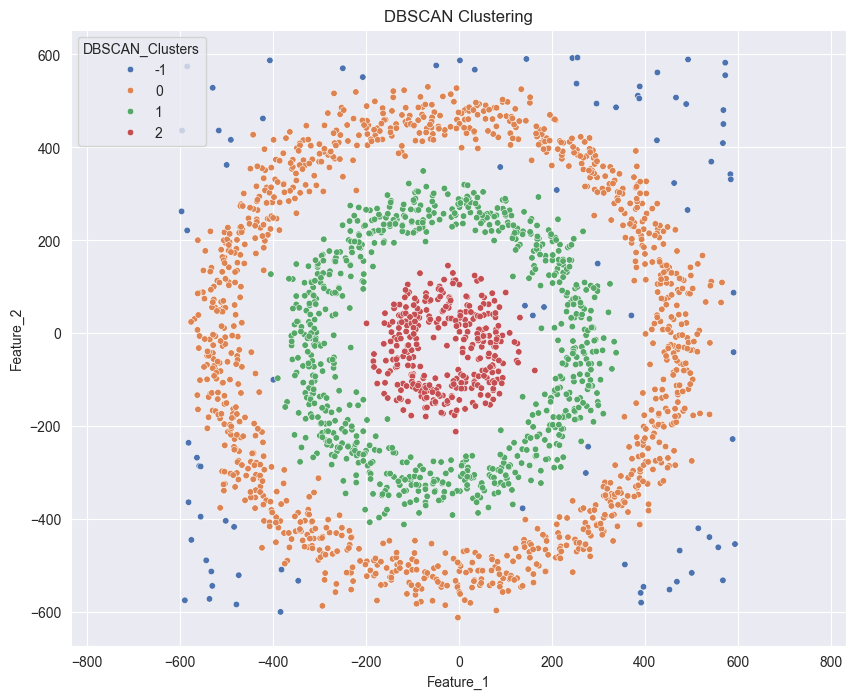

In [52]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data,
    x="Feature_1",
    y="Feature_2",
    hue="DBSCAN_Clusters",
    s=22,
    palette="deep",
)
plt.title("DBSCAN Clustering")
plt.axis("equal")
plt.show()